# Huidkanker Opsporen met Machine Learning

Huidkanker is een van de meest voorkomende vormen van kanker wereldwijd, en vroege detectie is belangrijk voor een betere overlevings kans. Dermatologen vertrouwen op visuele inspectie en biopsieën om huidkanker te diagnosticeren, maar deze manier kan tijdrovend en foutgevoelig zijn. Met de opkomst van kunstmatige intelligentie (AI) en diepe neurale netwerken, zoals convolutionele neurale netwerken (CNN's), is er een nieuwe mogelijkheid om huidkanker sneller en misschien wel nauwkeuriger te detecteren.

In dit project trainen we een machine learning-model, om huidkanker automatisch te herkennen aan de hand van afbeeldingen van huidlaesies. Door een dataset van medische beelden te gebruiken, ontwikkelen we een model dat onderscheid kan maken tussen kwaadaardige en goedaardige huidafwijkingen. Dit onderzoek heeft als doel om bij te dragen aan een efficiënter en betrouwbaarder hulpmiddel voor medische professionals in de strijd tegen huidkanker.

### Over de data
Voor dit onderzoek maak ik gebruik van De HAM1000-dataset. De HAM10000-dataset is een verzameling van 10.015 afbeeldingen van huidafwijkingen die is ontwikkeld om een belangrijk probleem in machine learning op te lossen: het tekort aan grote en diverse datasets voor het automatisch diagnosticeren van huidlaesies. Deze dataset helpt onderzoekers om betere modellen te ontwikkelen.

#### Categorieen huidafwijkingen in de dataset

De dataset bevat afbeeldingen van belangrijke huidafwijkingen, waaronder:

- **akiec**: Voorstadia van huidkanker  
- **bcc**: Basaalcelkanker  
- **bkl**: Goedaardige huidvlekken zoals ouderdomsvlekken  
- **df**: Dermatofibroom (goedaardige huidknobbels)  
- **mel**: Melanoom (gevaarlijke huidkanker)  
- **nv**: Moedervlekken  
- **vasc**: Vasculaire afwijkingen zoals angiomen (bloedvatgezwellen)

Later word hier meer over verteld

---

#### Betrouwbaarheid

- Meer dan de helft van de diagnoses is bevestigd met **histopathologie**, de gouden standaard op dit gebied.  
- De rest van de diagnoses is gecontroleerd door:
  - Vervolgonderzoeken  
  - Consensus van experts  
  - Geavanceerde microscopie  


### Categorieën van gepigmenteerde huidlaesies uitgelegd

De HAM10000-dataset bevat zeven  diagnostische categorieën van gepigmenteerde huidlaesies. Hieronder worden deze categorieën toegelicht:

---

#### 1. Actinische keratosen en intra-epitheliaal carcinoom (akiec)
- **Beschrijving**:  
  Actinische keratosen zijn ruwe, schilferige plekken op de huid veroorzaakt door langdurige blootstelling aan de zon. Ze worden beschouwd als precancereuze laesies, omdat ze kunnen uitgroeien tot plaveiselcelcarcinoom.  
  Bowen's disease is een vroege vorm van huidkanker die beperkt blijft tot de bovenste huidlaag.  

---

#### 2. Basaalcelcarcinoom (bcc)
- **Beschrijving**:  
  Basaalcelcarcinoom is de meest voorkomende vorm van huidkanker. Het groeit langzaam en verspreidt zich zelden, maar kan lokaal gevaarlijk zijn.  
  Het lijkt vaak op een glanzende, parelachtige knobbel of een licht schilferige plek, meestal op aan de zon blootgestelde huid zoals het gezicht.

---

#### 3. Goedaardige keratose-achtige laesies (bkl)
- **Beschrijving**:  
  Deze categorie omvat niet-kwaadaardige huidlaesies die op keratose lijken, waaronder:  
  - **Solar lentigines**: Bruine vlekken door blootstelling aan UV-straling.  
  - **Seborrheic keratoses**: Wasachtige, op de huid geplakte goedaardige gezwellen.  
  - **Lichen-planus keratoses**: Ontstekingsgerelateerde ruwe plekken.  
  Meestal zijn ze onschuldig, maar kunnen lijken op kwaadaardige laesies en vereisen soms nader onderzoek.

---

#### 4. Dermatofibroom (df)
- **Beschrijving**:  
  Een dermatofibroom is een goedaardige, harde huidknobbel die vaak ontstaat door een overreactie van bindweefsel na een klein trauma, zoals een insectenbeet.  
  Het voelt stevig aan, heeft een roodbruine kleur en is meestal pijnloos.

---

#### 5. Melanoom (mel)
- **Beschrijving**:  
  Melanoom is de meest ernstige vorm van huidkanker. Het ontstaat in melanocyten, de pigmentproducerende cellen van de huid.  
  Melanoom kan snel groeien en uitzaaien naar andere delen van het lichaam, wat levensbedreigend is.  
  Het heeft een nregelmatige vorm, kleurvariatie en veranderingen in grootte.

---

#### 6. Melanocytaire naevi (nv)
- **Beschrijving**:  
  Melanocytaire naevi zijn goedaardige moedervlekken, gevormd door clusters van melanocyten. Ze variëren in grootte, vorm en kleur.  
  Meestal symmetrisch, met gladde randen en een uniforme kleur.

---

#### 7. Vasculaire laesies (vasc)
- **Beschrijving**:  
  Vasculaire laesies zijn goedaardige afwijkingen die uit bloedvaten bestaan, waaronder:  
  - **Angiomen**: Kleine, rode of paarse bloedvatgezwellen.  
  - **Angiokeratomen**: Vergrote bloedvaten met een schilferig oppervlak.  
  - **Pyogene granulomen**: Roodbruine gezwellen die vaak ontstaan na huidtrauma.  
  - **Hemorrhage (bloedingen)**: Ophopingen van bloed onder de huid door verwondingen.  
  Herkenbaar aan hun rode, paarse of blauwe kleur.

---


In [174]:
import pandas as pd


bestand = '/students/2023-2024/Thema07/rumen_reactor/test/HAM10000_metadata.csv'

# Lees de metadata
df = pd.read_csv(bestand)

# Toon de eerste paar regels (head)
print(df.head())


     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


In [175]:
import os


image_base_path = '/students/2023-2024/Thema07/rumen_reactor/test/images'

  
image_paths = []


for _, row in df.iterrows():

    image_id = row['image_id']
    

    part_1_path = os.path.join(image_base_path, 'part_1', f'{image_id}.jpg')
    part_2_path = os.path.join(image_base_path, 'part_2', f'{image_id}.jpg')
    

    if os.path.exists(part_1_path):
        image_paths.append(part_1_path)
    elif os.path.exists(part_2_path):
        image_paths.append(part_2_path)
    else:
        image_paths.append(None)

df['image_path'] = image_paths


print(df.head())


     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                          image_path  
0  /students/2023-2024/Thema07/rumen_reactor/test...  
1  /students/2023-2024/Thema07/rumen_reactor/test...  
2  /students/2023-2024/Thema07/rumen_reactor/test...  
3  /students/2023-2024/Thema07/rumen_reactor/test...  
4  /students/2023-2024/Thema07/rumen_reactor/test...  


In [176]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
df['cell_type'] = df['dx'].map(lesion_type_dict.get) 

In [177]:
df['dx_index'] = df['dx'].astype('category').cat.codes

print(df.head())

     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                          image_path  \
0  /students/2023-2024/Thema07/rumen_reactor/test...   
1  /students/2023-2024/Thema07/rumen_reactor/test...   
2  /students/2023-2024/Thema07/rumen_reactor/test...   
3  /students/2023-2024/Thema07/rumen_reactor/test...   
4  /students/2023-2024/Thema07/rumen_reactor/test...   

                        cell_type  dx_index  
0  Benign keratosis-like lesions          2  
1  Benign keratosis-like lesions          2  
2  Benign keratosis-like lesions          2  
3  Benign keratosis-like lesions          2  
4  Benign ke

In [178]:
age_summary = df['age'].describe()
print(age_summary)

count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64


In [179]:
missing_values = df.isnull().sum()
print(missing_values)

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
image_path       0
cell_type        0
dx_index         0
dtype: int64


In [180]:
df['age'].fillna((df['age'].mean()), inplace=True)

/tmp/ipykernel_535455/1123070014.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna((df['age'].mean()), inplace=True)


In [181]:
missing_values = df.isnull().sum()
print(missing_values)

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
image_path      0
cell_type       0
dx_index        0
dtype: int64


In [182]:
dx_counts = df['dx'].value_counts()
sex_counts = df['sex'].value_counts()
localization_counts = df['localization'].value_counts()

print(dx_counts)


dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


In [183]:
print(sex_counts)

sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64


In [184]:
print(localization_counts)

localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64


Text(0.5, 1.0, 'Leeftijdsverdeling')

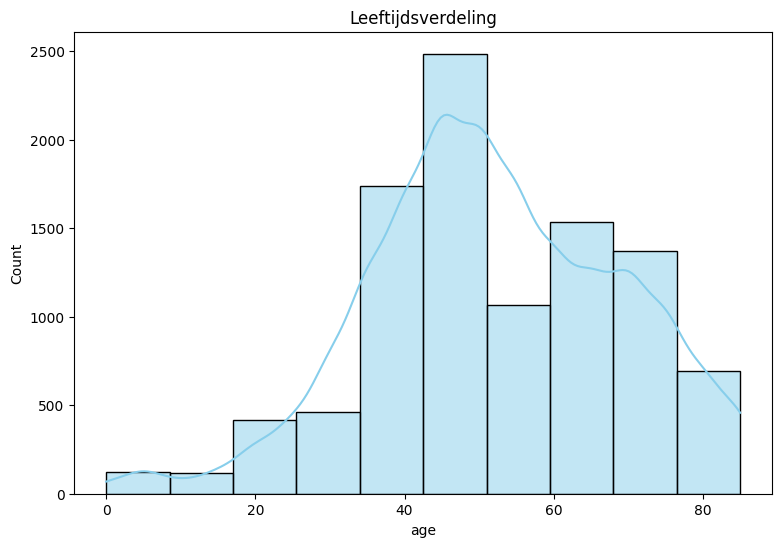

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 6)) 
sns.histplot(df['age'], kde=True, bins=10, color="skyblue")
plt.title("Leeftijdsverdeling")

/tmp/ipykernel_535455/2999442655.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dx', data=df, palette="viridis")


Text(0.5, 1.0, 'Diagnoseverdeling')

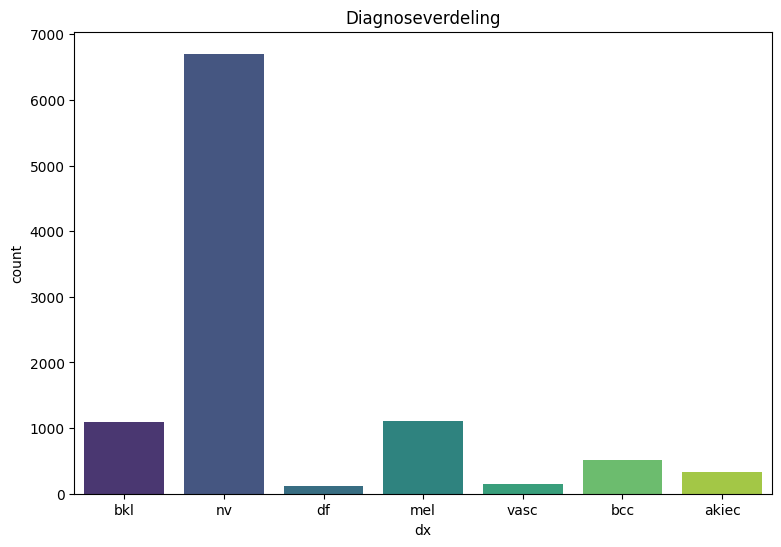

In [186]:
plt.figure(figsize=(9, 6))  # Pas de grootte van de afbeelding aan (14 inch breed, 10 inch hoog)
sns.countplot(x='dx', data=df, palette="viridis")
plt.title("Diagnoseverdeling")


/tmp/ipykernel_535455/3803608415.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette="coolwarm")


Text(0.5, 1.0, 'Geslachtsverdeling')

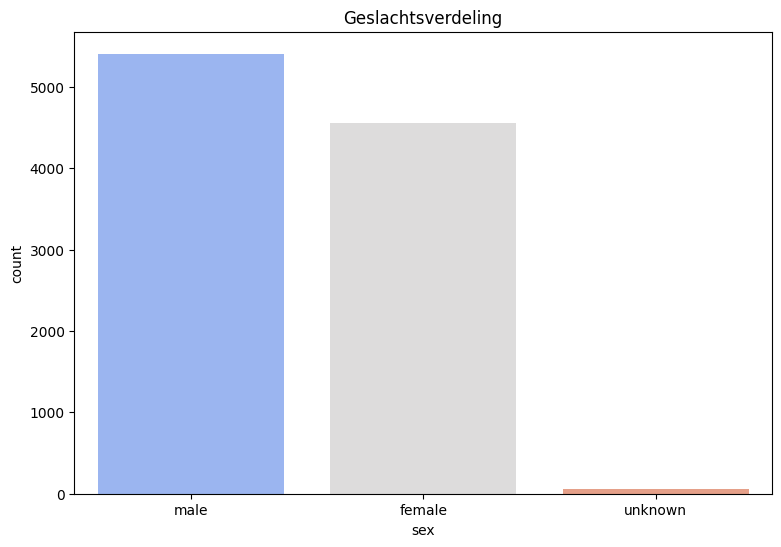

In [187]:
# 3. Geslacht Distributie
plt.figure(figsize=(9, 6)) 
sns.countplot(x='sex', data=df, palette="coolwarm")
plt.title("Geslachtsverdeling")

/tmp/ipykernel_535455/340515322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='localization', data=df, palette="magma")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'scalp'),
  Text(1, 0, 'ear'),
  Text(2, 0, 'face'),
  Text(3, 0, 'back'),
  Text(4, 0, 'trunk'),
  Text(5, 0, 'chest'),
  Text(6, 0, 'upper extremity'),
  Text(7, 0, 'abdomen'),
  Text(8, 0, 'unknown'),
  Text(9, 0, 'lower extremity'),
  Text(10, 0, 'genital'),
  Text(11, 0, 'neck'),
  Text(12, 0, 'hand'),
  Text(13, 0, 'foot'),
  Text(14, 0, 'acral')])

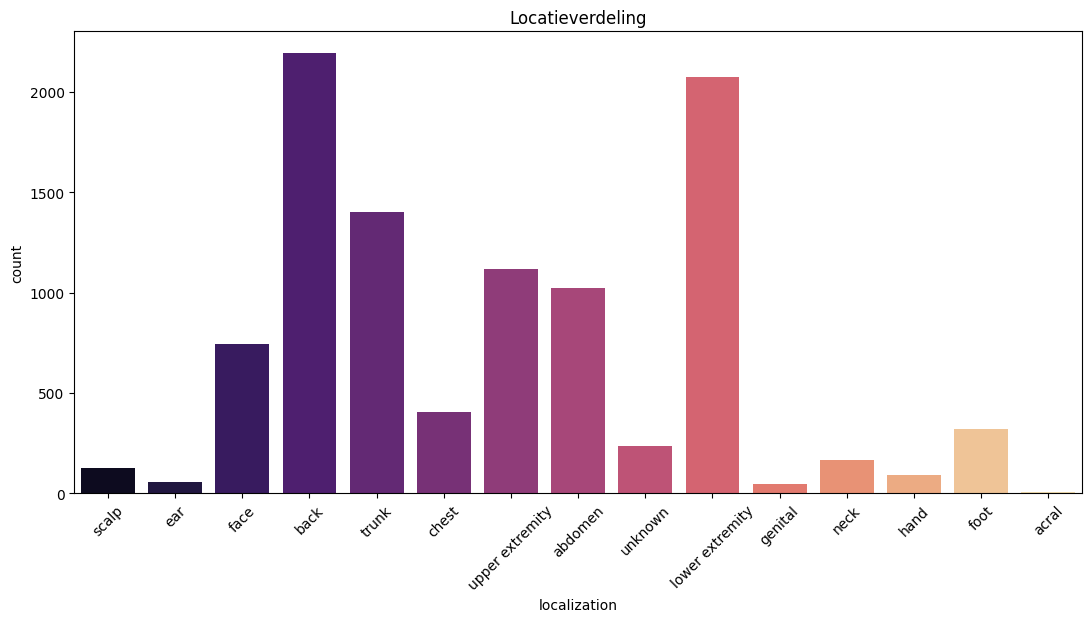

In [188]:
plt.figure(figsize=(13, 6))
sns.countplot(x='localization', data=df, palette="magma")
plt.title("Locatieverdeling")
plt.xticks(rotation=45)

/tmp/ipykernel_535455/3882272423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dx_type', data=df, palette="coolwarm")


Text(0.5, 1.0, 'Geslachtsverdeling')

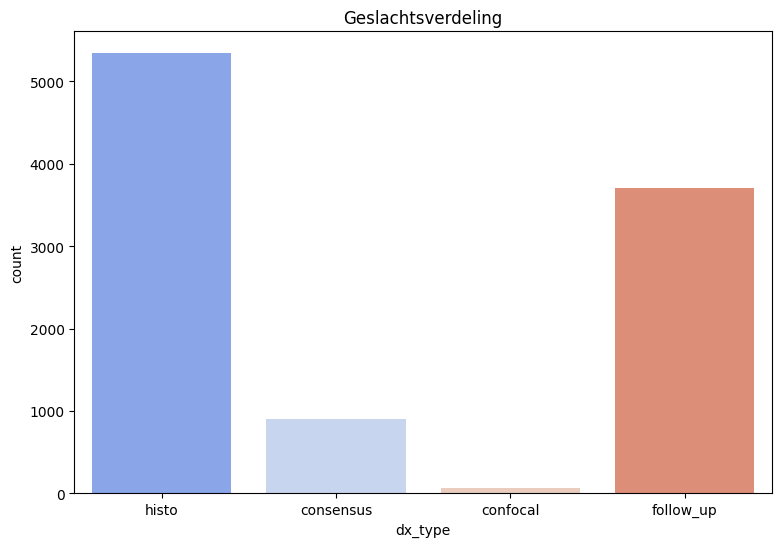

In [189]:
# 3. Geslacht Distributie
plt.figure(figsize=(9, 6)) 
sns.countplot(x='dx_type', data=df, palette="coolwarm")
plt.title("Geslachtsverdeling")

In [190]:
dx_mapping = df[['dx', 'dx_index']].drop_duplicates().sort_values(by='dx_index')

print(dx_mapping)

         dx  dx_index
9687  akiec         0
2462    bcc         1
0       bkl         2
1095     df         3
1211    mel         4
64       nv         5
2320   vasc         6


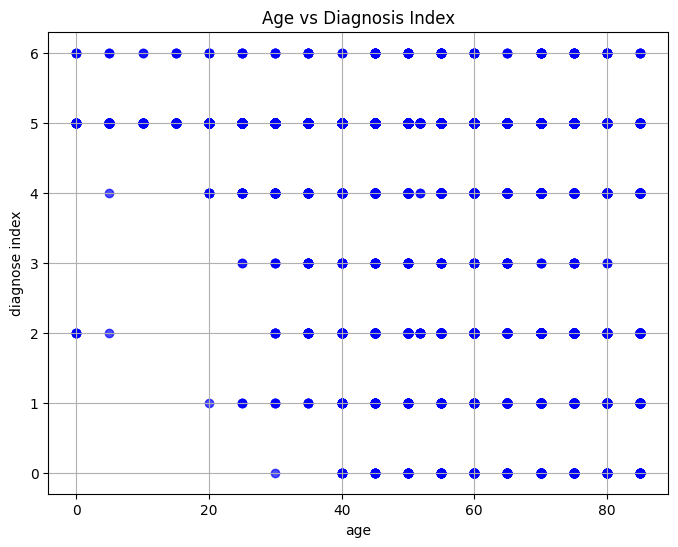

In [191]:
plt.figure(figsize=(8, 6))  
plt.scatter(df['age'], df['dx_index'], color='b', alpha=0.7)  
plt.title('Age vs Diagnosis Index')  
plt.xlabel('age')  
plt.ylabel('diagnose index') 
plt.grid(True)  
plt.show()  

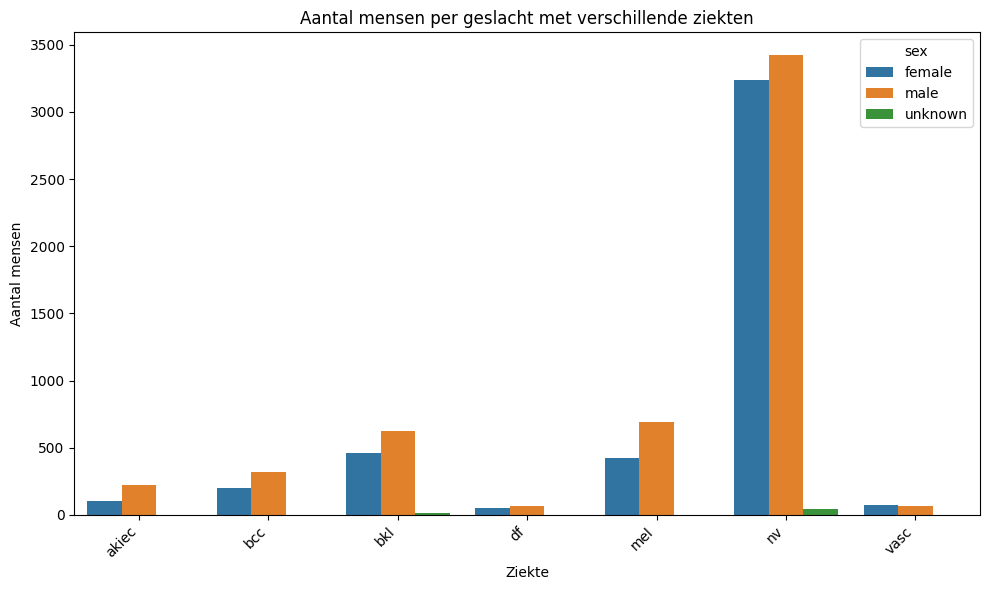

In [192]:

grouped_data = df.groupby(['sex', 'dx']).size().reset_index(name='count')

# Een barplot maken met seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=grouped_data, x='dx', y='count', hue='sex')

# Titels en labels toevoegen
plt.title('Aantal mensen per geslacht met verschillende ziekten')
plt.xlabel('Ziekte')
plt.ylabel('Aantal mensen')

# Weergave van de plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [193]:
from PIL import Image
import numpy as np
df['image'] = df['image_path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

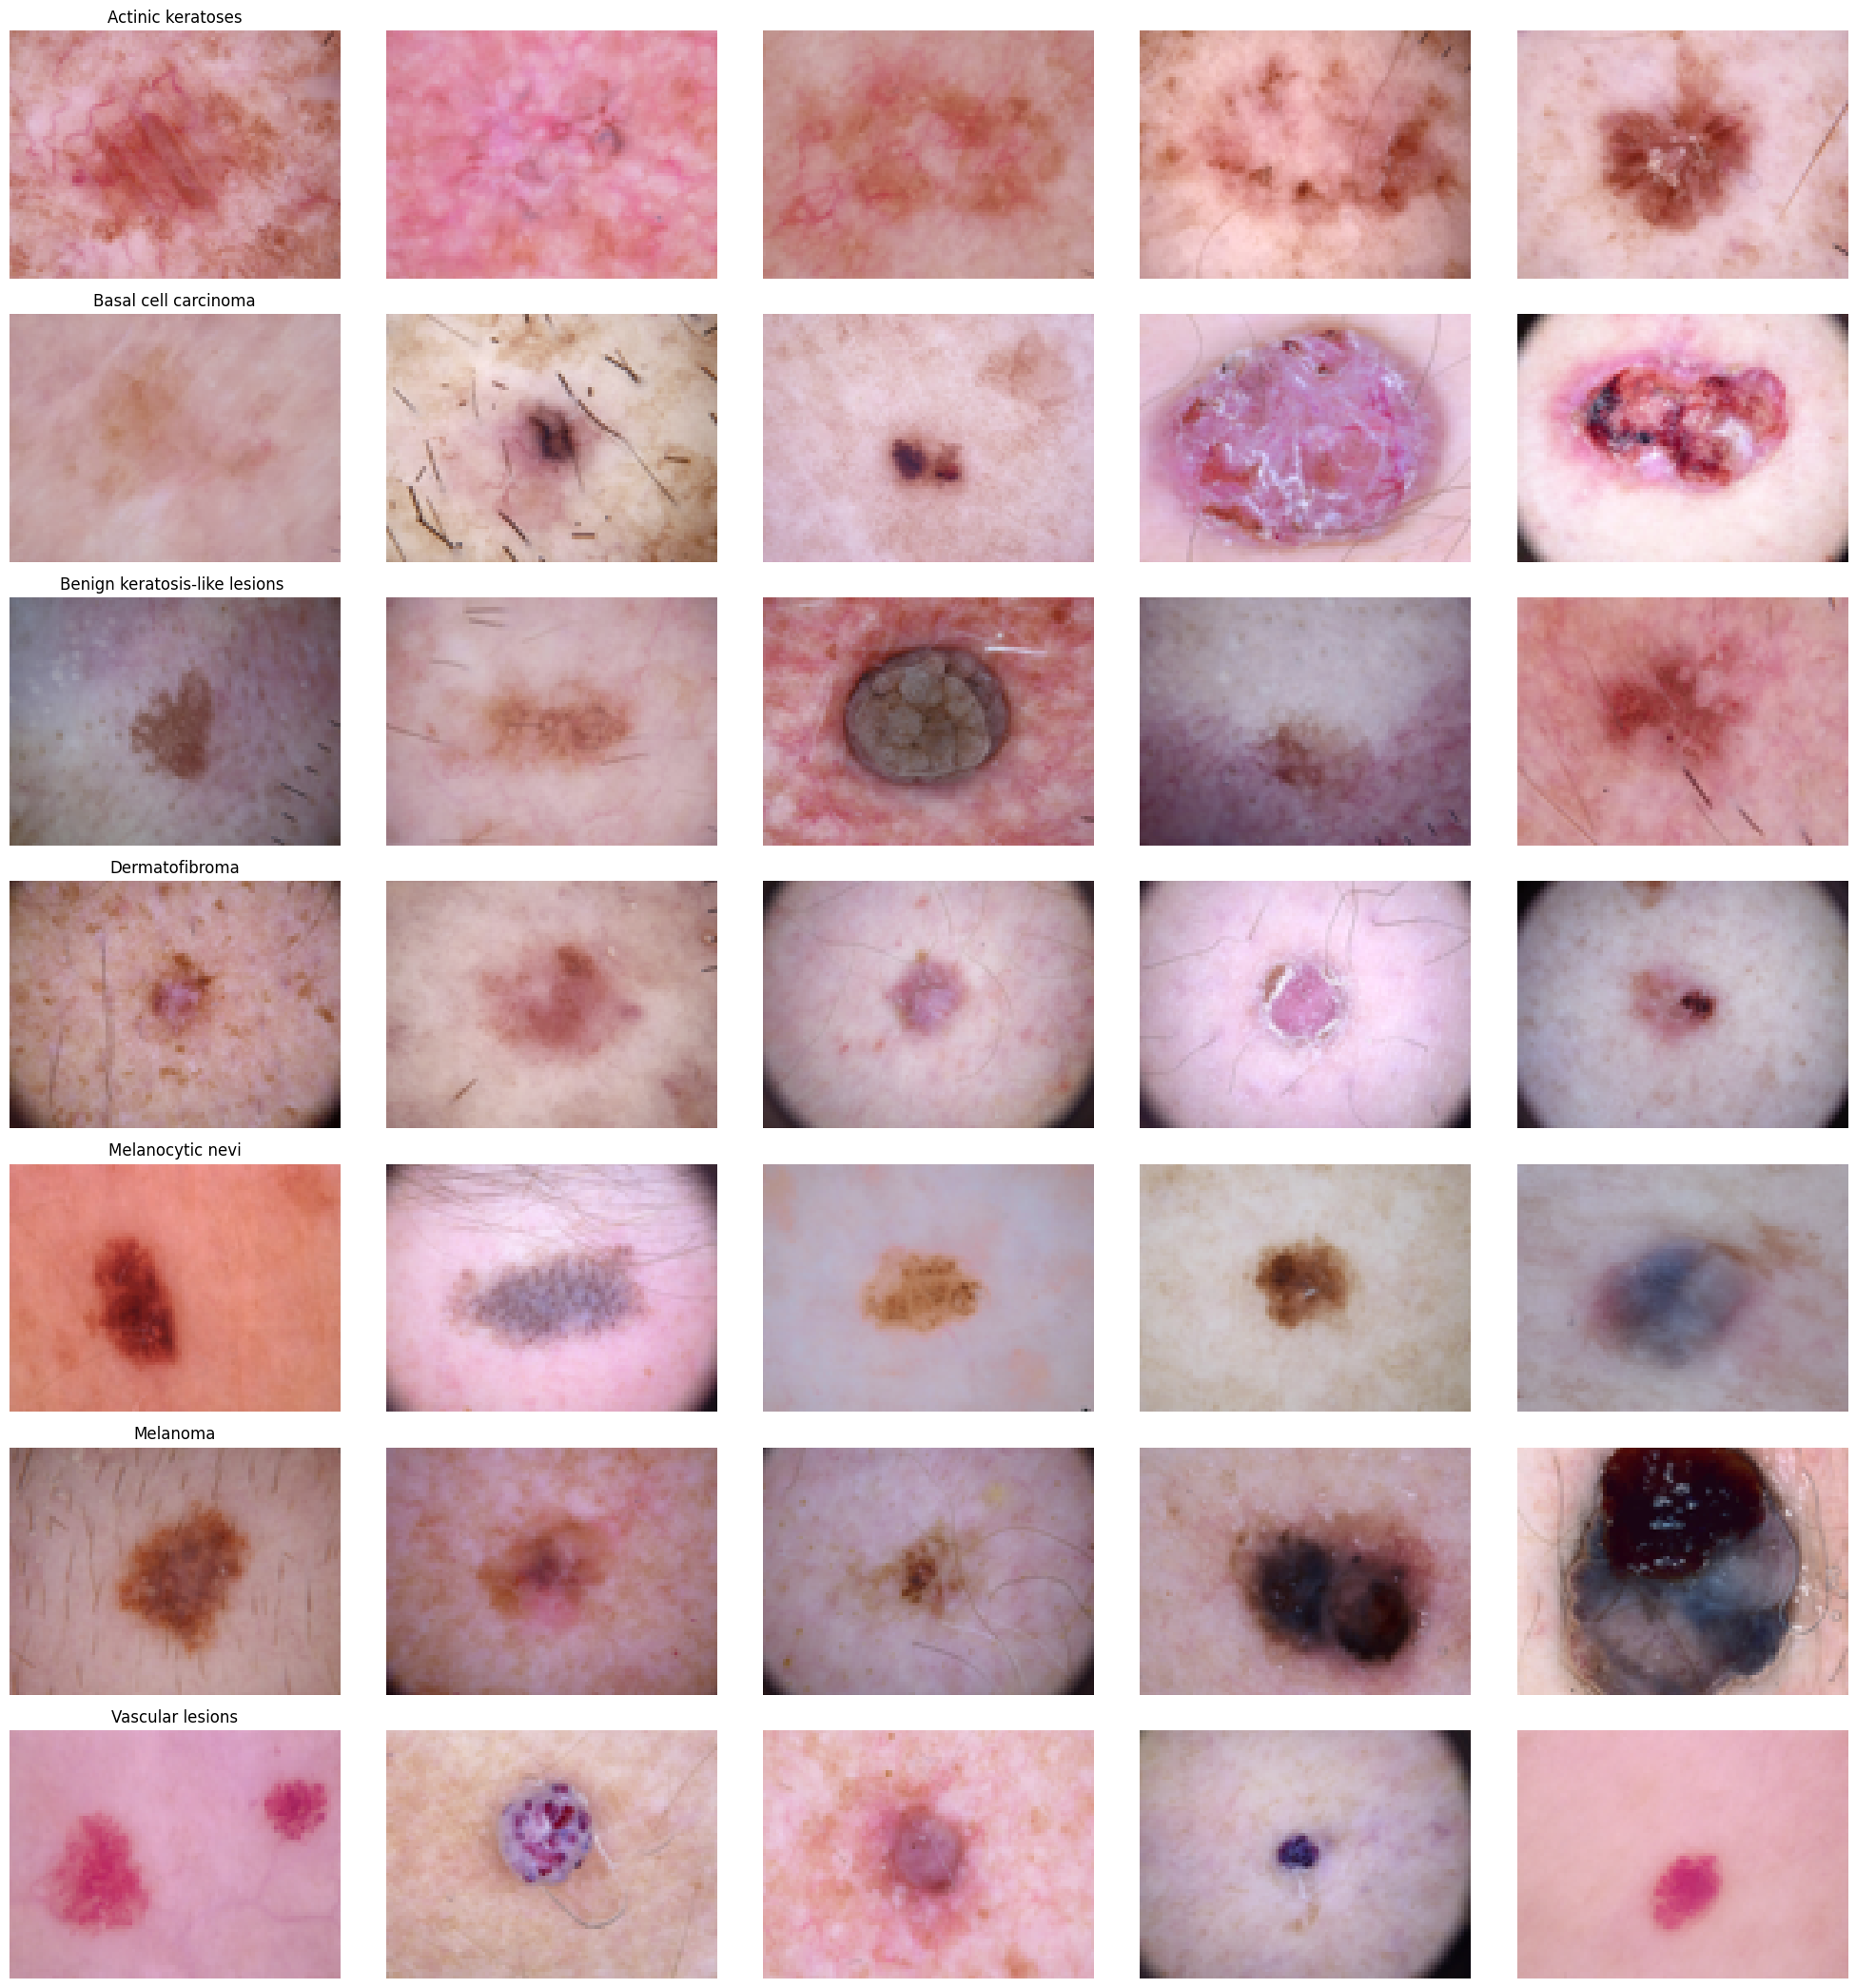

In [194]:
n_samples = 5

# Maak de subplots aan
fig, m_axs = plt.subplots(7, n_samples, figsize=(4 * n_samples, 3 * 7))

# Itereer door de cell_type groepen
for row_idx, (type_name, type_rows) in enumerate(df.sort_values(['cell_type']).groupby('cell_type')):
    m_axs[row_idx, 0].set_title(type_name)  # Zet de titel voor de eerste afbeelding van elke rij
    sampled_rows = type_rows.sample(n_samples, random_state=1234)  # Random samples
    for col_idx, (_, c_row) in enumerate(sampled_rows.iterrows()):
        m_axs[row_idx, col_idx].imshow(c_row['image'])  # Toon de afbeelding
  # Toon de afbeelding
        m_axs[row_idx, col_idx].axis('off')  # Zet de assen uit

# Sla de afbeelding op
fig.tight_layout()
plt.show()

In [195]:
features=df.drop(columns=['dx_index'],axis=1)
target=df['dx_index']

In [196]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)




In [197]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6]
[0 1 2 3 4 5 6]


In [198]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=7)  
y_test = to_categorical(y_test, num_classes=7)